In [65]:
# importing libraries
import numpy as np
import pandas as pd 
import seaborn as sn
from scipy import stats
import matplotlib.pyplot as plt

### Q1

<pre><b>
A F&B manager wants to determine whether there is any significant difference
in the diameter of the cutlet between two units. A randomly selected sample 
of cutlets was collected from both units and measured? Analyze the data and 
draw inferences at 5% significance level. Please state the assumptions and 
tests that you carried out to check validity of the assumptions.
</b></pre>

<pre>As diameter can be small or large <br>

So here 
    H<sub>o</sub>: There is no difference in the diameter of cutlet between two units
    H<sub>1</sub>: There is a significance difference between them
</pre>

In [66]:
# reading files
cutlets=pd.read_csv('Cutlets.csv')

In [67]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


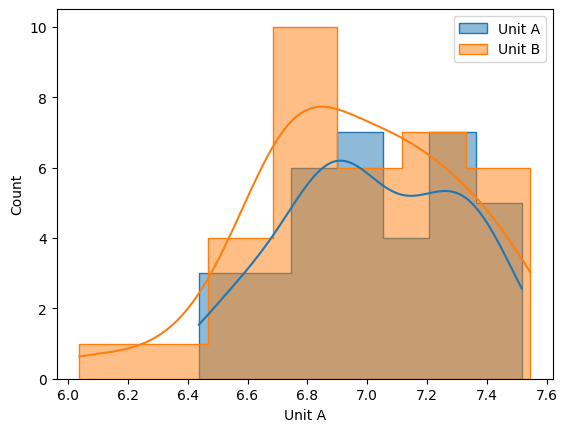

In [68]:
for i in cutlets.columns:    
    sn.histplot(cutlets[i],kde=True,label=i,element="step")
plt.legend()

In [69]:
# Checking their means and standard deviation
cutlets.describe().T[['mean','std']]

,mean,std
Unit A,7.019091,0.288408
Unit B,6.964297,0.343401


They seems similar<br>
But lets see what statistic shows us

In [70]:
# using ttest
stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'])

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

Since our pvalue is greater than 0.05 (significance value)<br>
So we failed to reject our null hypothesis <br>

i.e, '<b>There is no significance difference between the diameter of two units</b>.'

### Q3
<pre><b>
A hospital wants to determine whether there is any difference in the 
average Turn Around Time (TAT) of reports of the laboratories on their
preferred list. They collected a random sample and recorded TAT for 
reports of 4 laboratories. TAT is defined as sample collected to report 
dispatch.
   
Analyze the data and determine whether there is any difference in average
TAT among the different laboratories at 5% significance level.
</b></pre>

<pre>
Here H<sub>o</sub> : Average TAT is same among different laboratories
     H<sub>a</sub> : At lest one of them are different
</pre>

In [71]:
labtat=pd.read_csv('LabTAT.csv')
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


<pre>
Since we have 4 columns, we will check p values of each and every column.
If any one column has a p-value less than 0.05, we will reject null hypothesis 
i.e, average Turn Around Time is different among different Laboratories.

Else we will conclude that TAT is same in all labs


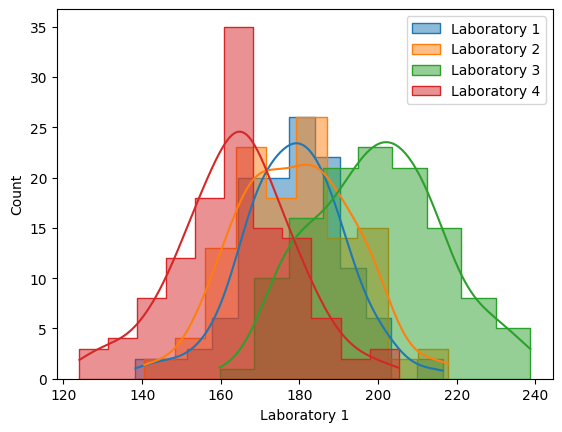

In [72]:
# Before that we will check their distributions
for i in labtat.columns:
    sn.histplot(labtat[i],kde=True,label=i,element="step")
plt.legend()

Above graph shows they might be different<br>
But lets check with mean and standard deviations 

In [73]:
labtat.describe().T[['mean','std']]

,mean,std
Laboratory 1,178.361583,13.173594
Laboratory 2,178.902917,14.957114
Laboratory 3,199.913250,16.539033
Laboratory 4,163.682750,15.085080


In [74]:
# now checking p-values
# using Anova Test
p=stats.f_oneway(labtat['Laboratory 1'],labtat['Laboratory 2'],labtat['Laboratory 3'],labtat['Laboratory 4'])[1]
p

2.1156708949992414e-57

In [75]:
p>0.05

False

Since p-value is less than 0.05, so we reject null alternate hypothesis<br>
i.e, Average TAT is not same among 4 labs

### Q3
<pre><b>
Sales of products in four different regions is tabulated 
for males and females. Find if male-female buyer rations 
are similar across regions.
</b></pre>

<pre>
Given H<sub>o</sub> : All proportions are equal
      H<sub>a</sub> : Not all Proportions are equal
</pre>

In [76]:
# Reading files
buyer_ratio=pd.read_csv('BuyerRatio.csv')
buyer_ratio

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [77]:
# As we have two categorical variable, will choose chi-square test
stats.chi2_contingency(np.array(buyer_ratio.drop('Observed Values',axis=1))) 

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

We can see our p-value is greater than 0.05 <br>
so we are accepting null hypothesis<br>
i.e, All propertions are same

### Q4

<pre><b>
TeleCall uses 4 centers around the globe to process customer order forms.
They audit a certain %  of the customer order forms. Any error in order 
form renders it defective and has to be reworked before processing.  
The manager wants to check whether the defective %  varies by centre. 
Please analyze the data at 5% significance level and help the manager 
draw appropriate inferences
</pre></b>


<pre>
Given H<sub>o</sub> : All centers have same defective percentage
      H<sub>a</sub> : it may vary
</pre>

In [78]:
# Importing data
orderform=pd.read_csv('Costomer+OrderForm.csv')
orderform.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [79]:
table_df=pd.DataFrame(columns=orderform.India.unique()) 
table_df

,Error Free,Defective


In [80]:
for i in orderform.columns:
    table_df.loc[i,]= orderform[i].value_counts().values

table_df

,Error Free,Defective
Phillippines,271,29
Indonesia,267,33
Malta,269,31
India,280,20


In [81]:
# As all of them are categorical
# So we will choose chisquare test

stats.chi2_contingency(np.array(table_df.T))

Chi2ContingencyResult(statistic=3.858960685820355, pvalue=0.2771020991233135, dof=3, expected_freq=array([[271.75, 271.75, 271.75, 271.75],
       [ 28.25,  28.25,  28.25,  28.25]]))

As p value is greater than 0.05, so our null hypothesis is true<br>
i.e, All centers have same defective percentage